In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time
from scrapy import Selector
from bs4 import BeautifulSoup as bs
import os
import csv
import itertools
import pandas as pd

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.maximize_window()



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\user\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache
<ipython-input-2-0d9242eb10b9>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [ ]:
driver.get("https://www.google.com/search?q=jobs.lever.co+remote+senior+software+engineer+us&biw=1920&bih=937&sxsrf=APq-WBslNX3i754iDckGZjqgnX9we9s6JA:1650001333470&ei=tQVZYounHKKL9u8P4MS7cA&uact=5&oq=jobs.lever.co+remote+senior+software+engineer+us&gs_lcp=Cgdnd3Mtd2l6EAMyBAgjECc6BwgAEEcQsAM6CggAEEcQsAMQyQNKBAhBGABKBAhGGABQ9AlYqhFg7hVoAnABeACAAcgCiAGZBpIBBTItMi4xmAEAoAEByAEIwAEB&sclient=gws-wiz&ibp=htl;jobs&sa=X&ved=2ahUKEwiG8v-CrpX3AhV5h_0HHXcpD5kQudcGKAJ6BAgJEC8#htivrt=jobs&htidocid=9ovoxnlUCkUAAAAAAAAAAA%3D%3D&fpstate=tldetail")
time.sleep(2)

In [ ]:

try:
    i = 0
    while True:
        options = driver.find_elements_by_xpath("//div[@role='treeitem']")
        driver.execute_script("arguments[0].scrollIntoView(true);",options[i])
        i+=1
        time.sleep(1)
except:
    pass

time.sleep(5)

In [ ]:
res = Selector(text=driver.page_source)

In [ ]:
companies = res.css('div.PuiEXc > div > div.vNEEBe::text').getall()
# posts = driver.find_elements_by_xpath("//div[@role='treeitem']")

In [ ]:
companies = ['Insider Intelligence']

In [ ]:
companies[112:]

In [ ]:
# for index,post in enumerate(posts):
#     print('Index: ', index)
#     post.click()
#     time.sleep(2)

#     res1 = Selector(text=driver.page_source)
#     company = res1.css('div.vNEEBe::text').getall()[index]
#     print('Company: ', company)
#     title = res1.css('h2.KLsYvd::text').getall()[index]
#     print('Title: ', title)
#     job_link = res1.css('#_0mhaYqTsKqjmsAfs1a3oBQ28 > div.mR2gOd > div > div > span > a::attr(href)').get()
#     print('Job Link: ', job_link)
#     break
    

In [ ]:
import itertools
for company in companies:
    time.sleep(3)
    print('Company: ', company)
#     company = 'givecampus'
    driver.get('https://www.google.com/search?q={}+jobs.lever.co+senior+software+engineer'.format(company))
    time.sleep(2)
    res1 = Selector(text=driver.page_source)
    link = res1.css('div.yuRUbf a::attr(href)').get()
    driver.get(link)
    time.sleep(2)
    res2 = Selector(text=driver.page_source)
    post = res2.css('div.posting-headline h2::text').get()
    if not post:
        post = res2.css('div.section.page-centered.posting-header h2::text').get()
    print('Job Tilte: ', post)
    job_link = driver.current_url
    print('Job Link: ', job_link)
    length_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div').getall()
    first_section_page_b_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) b::text').getall()
    first_section_page_a_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) b a::text').getall()
    first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) div::text').getall()
    if not first_section_page_text:
        first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) span::text').getall()
    
    if len(first_section_page_b_text) > 2:
        description = ''
        for index,combination in enumerate(itertools.zip_longest(first_section_page_text, first_section_page_b_text, first_section_page_a_text)):
            print('Combination: ', combination)
            print('Combination 0: ', combination[0])
            print('Combination 1: ', combination[1])
            if index == 0:
                try:
                    description = ' '.join(combination)
                except:
                    try:
                        description += combination[0] + combination[1]
                    except:
                        description += combination[0]
            else:
                try:
                    if combination[0]:
                        description += combination[0] + combination[1]
                    else:
                        description += combination[1]
                except:
                    description += combination[0]
            print(description)
    elif len(first_section_page_b_text) == 2:
        description = ''
        for text, b_text in zip(first_section_page_text,first_section_page_b_text):
            print('Text: ', text)
            print('B-Text: ', b_text)
            description += b_text
            description += text

        print('Description: ', description)
    else:
        description = ' '.join(first_section_page_text)
        print('Description: ', description)
    
    if not description:
        link = res1.css('div.yuRUbf a::attr(href)').getall()[1]
        driver.get(link)
        time.sleep(1)
        res2 = Selector(text=driver.page_source)
        post = res2.css('div.posting-headline h2::text').get()
        print('Job Tilte: ', post)
        job_link = driver.current_url
        print('Job Link: ', job_link)
        length_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div').getall()
        first_section_page_b_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) b::text').getall()
        first_section_page_a_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) b a::text').getall()
        first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) div::text').getall()
        if not first_section_page_text:
            first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) span::text').getall()
        if len(first_section_page_b_text) > 2:
            description = ''
            for index,combination in enumerate(itertools.zip_longest(first_section_page_text, first_section_page_b_text, first_section_page_a_text)):
                print('Combination 0: ', combination[0])
                print('Combination 1: ', combination[1])
                if index == 0:
                    try:
                        description = ' '.join(combination)
                    except:
                        try:
                            description += combination[0] + combination[1]
                        except:
                            description += combination[0]
                        
                            
                else:
                    try:
                        if combination[0]:
                            description += combination[0] + combination[1]
                        else:
                            description += combination[1]
                    except:
                        description += combination[0]
                print(description)
        elif len(first_section_page_b_text) == 2:
            description = ''
            for text, b_text in zip(first_section_page_text,first_section_page_b_text):
                print('Text: ', text)
                print('B-Text: ', b_text)
                description += b_text
                description += text

            print('Description: ', description)
        else:
            description = ' '.join(first_section_page_text)
            print('Description: ', description)
    
    if not description:
        link = res1.css('div.yuRUbf a::attr(href)').getall()[2]
        driver.get(link)
        time.sleep(1)
        res2 = Selector(text=driver.page_source)
        post = res2.css('div.posting-headline h2::text').get()
        print('Job Tilte: ', post)
        job_link = driver.current_url
        print('Job Link: ', job_link)
        length_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div').getall()
        first_section_page_b_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) b::text').getall()
        first_section_page_a_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) b a::text').getall()
        first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) div::text').getall()
        if not first_section_page_text:
            first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) span::text').getall()
        if len(first_section_page_b_text) > 2:
            description = ''
            for index,combination in enumerate(itertools.zip_longest(first_section_page_text, first_section_page_b_text, first_section_page_a_text)):
                print('Combination 0: ', combination[0])
                print('Combination 1: ', combination[1])
                if index == 0:
                    try:
                        description = ' '.join(combination)
                    except:
                        try:
                            description += combination[0] + combination[1]
                        except:
                            description += combination[0]
                else:
                    try:
                        if combination[0]:
                            description += combination[0] + combination[1]
                        else:
                            description += combination[1]
                    except:
                        description += combination[0]
                print(description)
        elif len(first_section_page_b_text) == 2:
            description = ''
            for text, b_text in zip(first_section_page_text,first_section_page_b_text):
                print('Text: ', text)
                print('B-Text: ', b_text)
                description += b_text
                description += text

            print('Description: ', description)
        else:
            description = ' '.join(first_section_page_text)
            print('Description: ', description)
    if not description:
        link = res1.css('div.yuRUbf a::attr(href)').getall()[3]
        driver.get(link)
        time.sleep(1)
        res2 = Selector(text=driver.page_source)
        post = res2.css('div.posting-headline h2::text').get()
        print('Job Tilte: ', post)
        job_link = driver.current_url
        print('Job Link: ', job_link)
        length_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div').getall()
        first_section_page_b_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) b::text').getall()
        first_section_page_a_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) b a::text').getall()
        first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) div::text').getall()
        if not first_section_page_text:
            first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) span::text').getall()
        if len(first_section_page_b_text) > 2:
            description = ''
            for index,combination in enumerate(itertools.zip_longest(first_section_page_text, first_section_page_b_text, first_section_page_a_text)):
                print('Combination 0: ', combination[0])
                print('Combination 1: ', combination[1])
                if index == 0:
                    try:
                        description = ' '.join(combination)
                    except:
                        try:
                            description += combination[0] + combination[1]
                        except:
                            description += combination[0]
                else:
                    try:
                        if combination[0]:
                            description += combination[0] + combination[1]
                        else:
                            description += combination[1]
                    except:
                        description += combination[0]
                print(description)
        elif len(first_section_page_b_text) == 2:
            description = ''
            for text, b_text in zip(first_section_page_text,first_section_page_b_text):
                print('Text: ', text)
                print('B-Text: ', b_text)
                description += b_text
                description += text

            print('Description: ', description)
        else:
            
            description = ' '.join(first_section_page_text)
            print('Description: ', description)
    company_link_page = res2.css('div.main-footer.page-full-width > div > p > a::attr(href)').get()
    
    if len(description) == 1:
        first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) span::text').getall()
        description = ' '.join(first_section_page_text)
        print('Description: ', description)
    
    temp = dict()
    temp['company'] = company
    temp['job_title'] = post
    temp['job_description'] = description
    temp['company_url'] = company_link_page
    temp['url'] = job_link

    if not os.path.isfile('jobs_lever.csv'):
        with open('jobs_lever.csv', 'w',newline="",encoding="utf-8") as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=temp.keys())
            writer.writeheader()
            writer.writerow(temp)
    else:
        with open('jobs_lever.csv', 'a',newline="",encoding="utf-8") as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=temp.keys())
            writer.writerow(temp)

In [ ]:
first_section_page_b_text

In [ ]:
first_section_page_text

# Latest Version

In [3]:
def scrape_companies(company,name):
    driver.get(company)
    time.sleep(2)
    res2 = Selector(text=driver.page_source)
    post = res2.css('div.posting-headline h2::text').get()
    if not post:
        post = res2.css('div.section.page-centered.posting-header h2::text').get()
#     print('Job Tilte: ', post)
    job_link = driver.current_url
#     print('Job Link: ', job_link)
    length_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div').getall()
    first_section_page_b_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) b::text').getall()
    first_section_page_a_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) b a::text').getall()
    first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) div::text').getall()
    if not first_section_page_text:
        first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) span::text').getall()

    if len(first_section_page_b_text) > 2:
        description = ''
        for index,combination in enumerate(itertools.zip_longest(first_section_page_text, first_section_page_b_text, first_section_page_a_text)):
#             print('Combination: ', combination)
#             print('Combination 0: ', combination[0])
#             print('Combination 1: ', combination[1])
            if index == 0:
                if combination:
                    try:
                        description = ' '.join(combination)
                    except:
                        try:
                            description += combination[0] + combination[1]
                        except:
                            try:
                                description += combination[0]
                            except:
                                description = ''
            else:
                try:
                    if combination[0]:
                        description += combination[0] + combination[1]
                    else:
                        description += combination[1]
                except:
                    description += combination[0]
#             print(description)
    elif len(first_section_page_b_text) == 2:
        description = ''
        for text, b_text in zip(first_section_page_text,first_section_page_b_text):
#             print('Text: ', text)
#             print('B-Text: ', b_text)
            description += b_text
            description += text

#         print('Description: ', description)
    else:
        description = ' '.join(first_section_page_text)
#         print('Description: ', description)

#     if not description:
#         link = res1.css('div.yuRUbf a::attr(href)').getall()[1]
#         driver.get(link)
#         time.sleep(1)
#         res2 = Selector(text=driver.page_source)
#         post = res2.css('div.posting-headline h2::text').get()
#         print('Job Tilte: ', post)
#         job_link = driver.current_url
#         print('Job Link: ', job_link)
#         length_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div').getall()
#         first_section_page_b_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) b::text').getall()
#         first_section_page_a_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) b a::text').getall()
#         first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) div::text').getall()
#         if not first_section_page_text:
#             first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) span::text').getall()
#         if len(first_section_page_b_text) > 2:
#             description = ''
#             for index,combination in enumerate(itertools.zip_longest(first_section_page_text, first_section_page_b_text, first_section_page_a_text)):
#                 print('Combination 0: ', combination[0])
#                 print('Combination 1: ', combination[1])
#                 if index == 0:
#                     try:
#                         description = ' '.join(combination)
#                     except:
#                         try:
#                             description += combination[0] + combination[1]
#                         except:
#                             description += combination[0]


#                 else:
#                     try:
#                         if combination[0]:
#                             description += combination[0] + combination[1]
#                         else:
#                             description += combination[1]
#                     except:
#                         description += combination[0]
#                 print(description)
#         elif len(first_section_page_b_text) == 2:
#             description = ''
#             for text, b_text in zip(first_section_page_text,first_section_page_b_text):
#                 print('Text: ', text)
#                 print('B-Text: ', b_text)
#                 description += b_text
#                 description += text

#             print('Description: ', description)
#         else:
#             description = ' '.join(first_section_page_text)
#             print('Description: ', description)

#     if not description:
#         link = res1.css('div.yuRUbf a::attr(href)').getall()[2]
#         driver.get(link)
#         time.sleep(1)
#         res2 = Selector(text=driver.page_source)
#         post = res2.css('div.posting-headline h2::text').get()
#         print('Job Tilte: ', post)
#         job_link = driver.current_url
#         print('Job Link: ', job_link)
#         length_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div').getall()
#         first_section_page_b_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) b::text').getall()
#         first_section_page_a_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) b a::text').getall()
#         first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) div::text').getall()
#         if not first_section_page_text:
#             first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) span::text').getall()
#         if len(first_section_page_b_text) > 2:
#             description = ''
#             for index,combination in enumerate(itertools.zip_longest(first_section_page_text, first_section_page_b_text, first_section_page_a_text)):
#                 print('Combination 0: ', combination[0])
#                 print('Combination 1: ', combination[1])
#                 if index == 0:
#                     try:
#                         description = ' '.join(combination)
#                     except:
#                         try:
#                             description += combination[0] + combination[1]
#                         except:
#                             description += combination[0]
#                 else:
#                     try:
#                         if combination[0]:
#                             description += combination[0] + combination[1]
#                         else:
#                             description += combination[1]
#                     except:
#                         description += combination[0]
#                 print(description)
#         elif len(first_section_page_b_text) == 2:
#             description = ''
#             for text, b_text in zip(first_section_page_text,first_section_page_b_text):
#                 print('Text: ', text)
#                 print('B-Text: ', b_text)
#                 description += b_text
#                 description += text

#             print('Description: ', description)
#         else:
#             description = ' '.join(first_section_page_text)
#             print('Description: ', description)
#     if not description:
#         link = res1.css('div.yuRUbf a::attr(href)').getall()[3]
#         driver.get(link)
#         time.sleep(1)
#         res2 = Selector(text=driver.page_source)
#         post = res2.css('div.posting-headline h2::text').get()
#         print('Job Tilte: ', post)
#         job_link = driver.current_url
#         print('Job Link: ', job_link)
#         length_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div').getall()
#         first_section_page_b_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) b::text').getall()
#         first_section_page_a_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) b a::text').getall()
#         first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) div::text').getall()
#         if not first_section_page_text:
#             first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) span::text').getall()
#         if len(first_section_page_b_text) > 2:
#             description = ''
#             for index,combination in enumerate(itertools.zip_longest(first_section_page_text, first_section_page_b_text, first_section_page_a_text)):
#                 print('Combination 0: ', combination[0])
#                 print('Combination 1: ', combination[1])
#                 if index == 0:
#                     try:
#                         description = ' '.join(combination)
#                     except:
#                         try:
#                             description += combination[0] + combination[1]
#                         except:
#                             description += combination[0]
#                 else:
#                     try:
#                         if combination[0]:
#                             description += combination[0] + combination[1]
#                         else:
#                             description += combination[1]
#                     except:
#                         description += combination[0]
#                 print(description)
#         elif len(first_section_page_b_text) == 2:
#             description = ''
#             for text, b_text in zip(first_section_page_text,first_section_page_b_text):
#                 print('Text: ', text)
#                 print('B-Text: ', b_text)
#                 description += b_text
#                 description += text

#             print('Description: ', description)
#         else:

#             description = ' '.join(first_section_page_text)
#             print('Description: ', description)
#     company_link_page = res2.css('div.main-footer.page-full-width > div > p > a::attr(href)').get()

    if len(description) == 1:
        first_section_page_text = res2.css('body > div.content-wrapper.posting-page > div > div:nth-child(2) > div:nth-child(1) span::text').getall()
        description = ' '.join(first_section_page_text)
#         print('Description: ', description)

    temp = dict()
    temp['company'] = name
    temp['job_title'] = post
    temp['job_description'] = description
    temp['url'] = job_link
    print('Temp: ', temp)

    if not os.path.isfile('jobs_lever2.csv'):
        with open('jobs_lever2.csv', 'w',newline="",encoding="utf-8") as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=temp.keys())
            writer.writeheader()
            writer.writerow(temp)
    else:
        with open('jobs_lever2.csv', 'a',newline="",encoding="utf-8") as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=temp.keys())
            writer.writerow(temp)

Companies:  ['https://jobs.lever.co/jobandtalent/a8031db4-0f9d-4f56-9be3-36482691f9ab', 'https://jobs.lever.co/ritual/7488c3f9-694e-440c-a1c4-f6ccab45f571', 'https://jobs.lever.co/emeritus/ab1cf6e6-cf46-4860-9317-4f7c83b777bf', 'https://jobs.lever.co/donut/5dd4fba5-27f2-45ea-a9b0-bce76fd9947a', 'https://jobs.lever.co/apptegy/e6408635-f5a7-41a2-8603-6ec10e62dd8d', 'https://jobs.lever.co/farfetch/569df374-dba6-490d-8eab-2e8f1b56c8cc', 'https://jobs.lever.co/polleverywhere/4471f7ca-0510-480d-8d03-d33bbe5edb7d', 'https://jobs.lever.co/landing/19af0f97-1188-4bc8-8fbb-c0a7004ac206', 'https://jobs.lever.co/secureframe/e082c714-c8a2-4dd4-ba9a-335a21b8a928?utm_source=found.dev', 'https://jobs.lever.co/gorillalogic/47a3c7d2-9b1b-4679-89e2-9e6dbba89f8b']
Company:  https://jobs.lever.co/jobandtalent/a8031db4-0f9d-4f56-9be3-36482691f9ab
Temp:  {'company': 'jobandtalent', 'job_title': 'HQ - Ruby on Rails Software Engineer  (EMEA Remote)', 'job_description': 'Jobandtalent connects good people with en

Temp:  {'company': 'farfetch', 'job_title': 'Ruby on Rails Engineer', 'job_description': "Hello. We're Stadium Goods. We are the world's premier sneaker + streetwear marketplace selling only the most sought-after footwear, apparel and other hard-to-find items on behalf of our sellers. We are driven by our principles and committed to providing the best consumer and consignment experience there is. In January 2019, Stadium Goods became part of the Farfetch family of companies, which will help guide our evolution as we usher in the next chapter of scale and growth. The Engineering and QA Team partners closely with Product to build and deliver new features that can drive business value. They also are responsible for maintaining the platform, from eliminating bugs to applying security updates. We are looking for engineering talent to join us on our roadmap to architect, engineer, deploy and scale a new generation of marketplace technologies, in addition to supporting our current ecosystem o

Temp:  {'company': 'kaiahealth', 'job_title': 'Senior Ruby on Rails Engineer', 'job_description': 'Our story began in 2016, when our founders Konstantin Mehl and Manuel Thurner, set out on a mission to bring affordable and accessible relief to millions of people with chronic conditions.\xa0 No strangers to chronic pain themselves, they decided to innovate ways to remove the obstacles many people experience in getting the leading-edge care they need in order to live their best lives. How do Kaia apps work? Kaia uses a dynamic AI-powered algorithm. Our programs are based on multimodal rehabilitation, a holistic approach to managing chronic conditions. Our users have easy access via smartphone and tablet to our programs for back/hip/knee pain and COPD using this evidence-based approach. Five years into our story, we are a leader in digital therapeutics, with 500,000+ users worldwide. Having raised $125 million from investors such as Optum Ventures, idInvest, and Balderton Capital. We are 

Temp:  {'company': 'backstage', 'job_title': 'Tech Lead - Ruby on Rails / React', 'job_description': 'ShareGrid is the largest and most trusted marketplace for creatives. Filmmakers, photographers, and production companies can instantly source all their gear needs from the community and vendors.  -----------------------------------------------------------------------------------------------------------------------------', 'url': 'https://jobs.lever.co/backstage/32d23b4d-7a31-453a-abd8-c3f8b9d0528e'}
Company:  https://jobs.lever.co/zipline.io/3ff13194-5e5b-4861-a5dc-401109ab3c3a
Temp:  {'company': 'zipline.io', 'job_title': 'Senior/Lead/Principal Ruby on Rails Engineer', 'job_description': 'If you love start-ups, are an avid learner and are keen to go on a rapid growth journey - read on!\xa0\xa0Zipline helps organisations automate, track and improve the experience of people coming in and out of their places. This is a super important challenge to solve given the changing restrictions th
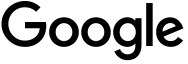

Temp:  {'company': 'teamairship', 'job_title': 'Mid-to-Senior Software Developer (Ruby on Rails)', 'job_description': 'We are looking for a Mid-to-Senior Web Developer with experience or interest in learning Ruby on Rails.Airship is a creative design and custom development company that delivers high-quality software solutions companies can rely on to turn ideas into reality. We are a remote-first company with a passion for creating incredible experiences and having fun while doing it! We encourage and support one another and we always strive to pursue excellence and provide value in all that we do. MissionWe care deeply about understanding our customers — from their business goals to their users’ needs — to make our partnership and software solutions as wildly successful as possible.', 'url': 'https://jobs.lever.co/teamairship/0b814e1b-6ffc-4db6-90fd-445c4679f525'}
Company:  https://jobs.lever.co/cardiologs/15c3c0bc-2c80-45e7-a3b6-4d4ed772583a
Temp:  {'company': 'cardiologs', 'job_titl

Temp:  {'company': 'sensortower', 'job_title': 'Senior Ruby on Rails Developer', 'job_description': 'Ruby engineers at Sensor Tower apply their creativity and backend experience to create meaningful, actionable data products and insights about mobile apps. This role focuses on designing, implementing, and optimizing performant and scalable solutions to manage our high volume data pipelines. As our data is central to the Sensor Tower product, this is a high impact role. Backend Ruby developers at Sensor Tower serve as force multipliers for all of our engineering teams by ensuring easy access to data for all, scaling our system to enable the development of more sophisticated features, and implementing widely used tooling. Recent examples of such impactful projects include: - ~10x scaling of data science processing jobs, enabling us to generate more granular mobile app analytics breakdowns - Migrating high volume data from MongoDB to ClickHouse for blazing fast, simpler, more generalizabl
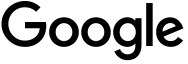

Companies:  ['https://jobs.lever.co/Novi/cce1de9f-e93b-4849-9d77-79ab73a0a17c', 'https://jobs.lever.co/jobandtalent/a8031db4-0f9d-4f56-9be3-36482691f9ab/apply', 'https://jobs.lever.co/boldpenguin/f06e882b-8597-4019-8fc0-48a2479ce911', 'https://jobs.lever.co/cardiologs/2dbaba00-e6d5-49ab-b549-59e9e0ed6939/apply', 'https://jobs.lever.co/quincus/bf84f0d1-774a-4fab-a8fe-4826af6888d4', 'https://jobs.lever.co/htdevelopers/00ca2541-6f6f-44e4-ab25-3ef8d3e89ac6', 'https://jobs.lever.co/janeapp/e16aad3e-1ad8-4b41-9ea5-146a1dd7d5a3/apply', 'https://jobs.lever.co/kotisdesign/19db5473-b54d-4df4-a433-2e35a49c5de2', 'https://jobs.lever.co/Novi/cce1de9f-e93b-4849-9d77-79ab73a0a17c/apply', 'https://jobs.lever.co/kotisdesign/19db5473-b54d-4df4-a433-2e35a49c5de2/apply']
Company:  https://jobs.lever.co/Novi/cce1de9f-e93b-4849-9d77-79ab73a0a17c
Temp:  {'company': 'Novi', 'job_title': 'Ruby on Rails Engineer', 'job_description': "About UsAt Novi, our mission is to enable the future of consumer product devel

Temp:  {'company': 'Novi', 'job_title': 'Ruby on Rails Engineer', 'job_description': '', 'url': 'https://jobs.lever.co/Novi/cce1de9f-e93b-4849-9d77-79ab73a0a17c/apply'}
Company:  https://jobs.lever.co/kotisdesign/19db5473-b54d-4df4-a433-2e35a49c5de2/apply
Temp:  {'company': 'kotisdesign', 'job_title': 'Software Engineer (Ruby on Rails)', 'job_description': '', 'url': 'https://jobs.lever.co/kotisdesign/19db5473-b54d-4df4-a433-2e35a49c5de2/apply'}
ELLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLSSSSSSSSSSSSSSSSSSSSEEEEEEEEEEEEEEEEEEEE
Delete Tags:  [<div class="action-menu" jscontroller="yGWMub"><a aria-expanded="false" aria-haspopup="true" aria-label="Result options" class="GHDvEf" data-ved="2ahUKEwjY77jtzp73AhUK_6QKHY3HD1I4KBDsHXoECAMQBA" href="#" jsaction="PZcoEd;keydown:wU6FVd;keypress:uWmNaf" role="button"><span class="gTl8xb"></span></a><ol class="action-menu-panel wHYlTd zsYMMe" data-ved="2ahUKEwjY77jtzp73AhUK_6QKHY3HD1I4KBCpH3oECAMQBQ" jsaction="keydown:Xiq7wd;mouseover:pKP
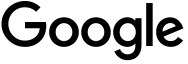

Temp:  {'company': 'pennylane', 'job_title': 'Senior Fullstack Engineer ( Ruby on Rails / React.js )  🇪🇸', 'job_description': '🎯 Your mission Pennylane is building the financial OS (Operating System) for European SMEs. A single source of truth for financial data, used on one side by entrepreneurs to run their business (invoicing and getting paid, paying suppliers and expense management, piloting cash and profitability) and on the other side by their accountant for bookkeeping and fiscal declarations.🏠 Offices Saving time to all entrepreneurs and accountants, helping them to make the right decisions and enabling 3rd parties to offer added-value personalized financial services.', 'url': 'https://jobs.lever.co/pennylane/29db194b-c14e-4eef-8c11-4e2695773518?utm_source=found.dev'}
Company:  https://jobs.lever.co/polleverywhere/4471f7ca-0510-480d-8d03-d33bbe5edb7d/apply
Temp:  {'company': 'polleverywhere', 'job_title': 'Full Stack Engineer - Ruby on Rails', 'job_description': '', 'url': 'htt
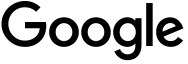

Temp:  {'company': 'coupa', 'job_title': 'Ruby on Rails - Senior Software Engineer', 'job_description': 'Coupa Software (NASDAQ: COUP), a leader in business spend management (BSM), has been certified as a “Great Place to Work” by the\xa01. Ensure Customer Success organization. We deliver “Value as a Service” by helping our customers maximize their spend under management, achieve significant cost savings and drive profitability. Coupa provides a unified, cloud-based spend management platform that connects hundreds of organizations representing the Americas, EMEA, and APAC with millions of suppliers globally. The Coupa platform provides greater visibility into and control over how companies spend money. Customers – small, medium and large – have used the Coupa platform to bring billions of dollars in cumulative spend under management. Learn more at\xa02. Focus On Results. Read more on the\xa03. Strive For Excellence\xa0or follow\xa0.', 'url': 'https://jobs.lever.co/coupa/490447e9-d8d8-46

Temp:  {'company': 'quincus', 'job_title': 'Senior Ruby on Rails Developer', 'job_description': '', 'url': 'https://jobs.lever.co/quincus/44b40b09-09a9-4cb1-9e40-ea62e69c4cca/apply'}
Company:  https://jobs.lever.co/apptegy/dd7a3150-1c32-4f02-b8ef-ff3605e1e20b/apply
Temp:  {'company': 'apptegy', 'job_title': 'Ruby On Rails Engineer', 'job_description': '', 'url': 'https://jobs.lever.co/apptegy/dd7a3150-1c32-4f02-b8ef-ff3605e1e20b/apply'}
Company:  https://jobs.lever.co/gorillalogic/9f3904c3-7759-40fa-9126-4d1c4eb0ffb8/apply
Temp:  {'company': 'gorillalogic', 'job_title': 'Senior Fullstack Developer - Ruby on Rails - JT', 'job_description': '', 'url': 'https://jobs.lever.co/gorillalogic/9f3904c3-7759-40fa-9126-4d1c4eb0ffb8/apply'}
ELLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLSSSSSSSSSSSSSSSSSSSSEEEEEEEEEEEEEEEEEEEE
Delete Tags:  [<div class="action-menu" jscontroller="yGWMub"><a aria-expanded="false" aria-haspopup="true" aria-label="Result options" class="GHDvEf" data-ved="2ahUK
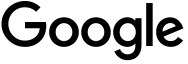

Temp:  {'company': 'htdevelopers', 'job_title': 'Ruby on Rails Developer', 'job_description': '', 'url': 'https://jobs.lever.co/htdevelopers/00ca2541-6f6f-44e4-ab25-3ef8d3e89ac6/apply'}
Company:  https://jobs.lever.co/getaround/34324334-c622-4350-a681-81a409d94aaf
Temp:  {'company': 'getaround', 'job_title': 'Backend Developer - Ruby / Rails - Remote / Onsite', 'job_description': "We believe in a world where all cars are shared. Carsharing empowers people to get going in a smarter, easier way, while also having a positive impact on the environment and making cities more liveable. It’s this vision that propels us forward and inspires us to think even bigger.    How we workSince April 2019, Drivy is part of Getaround. Together, we’re the world's leading carsharing platform with a community of more than 5 million users sharing over 11,000 connected cars across 7 countries.solid communicationOur team is collaborative, positive, curious, and engaged. We think fast, laugh often, and are look

Temp:  {'company': 'Potloc', 'job_title': None, 'job_description': "\n        \n       \n        \n       \n        \n       \n        \n       \n        \n       \n        \n       \n        \n       \n       Our team is building a dashboard to present all of our data into a clear and reliable internal tool used to drive thousands of respondents to our surveys. You will help us in bringing near real-time performance insights to our clients and build a scalable product.\n       \n        \n       \n       At Potloc, we are driven by AMBITION, LEARNING, TRANSPARENCY and TEAM SPIRIT. Our people are at the core of everything we do and these values guide our every decision.\xa0We are committed to the dev community: we participate in meetups, peer mentoring and open source platforms.\n       \n        \n       \n       By joining Potloc, you will have the opportunity to work on innovative, open-source technologies and the latest web tech stack. Also, we love board games, playing music, outd
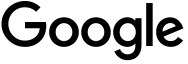

Temp:  {'company': 'gospotcheck', 'job_title': 'Backend Engineer (Ruby on Rails)', 'job_description': '', 'url': 'https://jobs.lever.co/gospotcheck/4f4f00c8-ca66-4b15-a1e8-df93e69d24ea/apply'}
Company:  https://jobs.lever.co/gorillalogic/7db85bc1-7aec-4bca-a7a3-ebc68423e75e/apply
Temp:  {'company': 'gorillalogic', 'job_title': "Sorry, we couldn't find anything here", 'job_description': '', 'url': 'https://jobs.lever.co/gorillalogic/7db85bc1-7aec-4bca-a7a3-ebc68423e75e/apply'}
Company:  https://jobs.lever.co/coupa/490447e9-d8d8-4692-8972-e791364eb0e7
Temp:  {'company': 'coupa', 'job_title': 'Ruby on Rails - Senior Software Engineer', 'job_description': 'Coupa Software (NASDAQ: COUP), a leader in business spend management (BSM), has been certified as a “Great Place to Work” by the\xa01. Ensure Customer Success organization. We deliver “Value as a Service” by helping our customers maximize their spend under management, achieve significant cost savings and drive profitability. Coupa provid
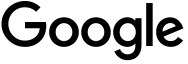

Temp:  {'company': 'cover-2', 'job_title': 'Lead Software Engineer (Ruby on Rails) - Remote', 'job_description': '\xa0 \xa0 \xa0', 'url': 'https://jobs.lever.co/cover-2/aca63c6f-adda-408e-8585-e3e7c030a894'}
Company:  https://jobs.lever.co/emeritus/21dc4614-a11a-46b6-a05e-e1210f201380
Temp:  {'company': 'emeritus', 'job_title': "Sorry, we couldn't find anything here", 'job_description': '', 'url': 'https://jobs.lever.co/emeritus/21dc4614-a11a-46b6-a05e-e1210f201380'}
Company:  https://jobs.lever.co/growthtribe/c530cc12-17dd-4a9c-9270-5f205bd48f52/apply
Temp:  {'company': 'growthtribe', 'job_title': 'Ruby on Rails Developer', 'job_description': '', 'url': 'https://jobs.lever.co/growthtribe/c530cc12-17dd-4a9c-9270-5f205bd48f52/apply'}
Company:  https://jobs.lever.co/coupa/83e95e1f-5bbe-4844-a29b-b2d8009fda51
Temp:  {'company': 'coupa', 'job_title': "Sorry, we couldn't find anything here", 'job_description': '', 'url': 'https://jobs.lever.co/coupa/83e95e1f-5bbe-4844-a29b-b2d8009fda51'}
Co
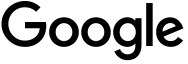

Temp:  {'company': 'pennylane', 'job_title': 'Senior Fullstack Engineer ( Ruby on Rails / React.js ) 🇵🇹', 'job_description': 'Pennylane is building the financial OS (Operating System) for European SMEs. A single source of truth for financial data, used on one side by entrepreneurs to run their business (invoicing and getting paid, paying suppliers and expense management, piloting cash and profitability) and on the other side by their accountant for bookkeeping and fiscal declarations. Saving time to all entrepreneurs and accountants, helping them to make the right decisions and enabling 3rd parties to offer added-value personalized financial services. We’ve launched in France and will expand to other markets in Continental Europe in 2022. Our commercial website is thus in French only but the code is obviously documented in English and our tech team speaks English. We’re product-led, growing fast, backed by strong investors and are starting to hire software engineers anywhere in Europe,
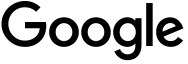

Temp:  {'company': 'copper', 'job_title': 'Senior Full-Stack Engineer (Ruby on Rails - Remote)', 'job_description': '', 'url': 'https://jobs.lever.co/copper/08932bc9-46b2-46ba-bcb1-b501f5ec794e/apply'}
Company:  https://jobs.lever.co/Cuttlesoft/a2bd6baf-3372-4827-8d58-02817b1e198b/apply
Temp:  {'company': 'Cuttlesoft', 'job_title': 'Ruby on Rails Engineer', 'job_description': '', 'url': 'https://jobs.lever.co/Cuttlesoft/a2bd6baf-3372-4827-8d58-02817b1e198b/apply'}
Company:  https://jobs.lever.co/roofstock/827207c2-7828-465e-9bf6-b4d0373eb203
Temp:  {'company': 'roofstock', 'job_title': "Sorry, we couldn't find anything here", 'job_description': '', 'url': 'https://jobs.lever.co/roofstock/827207c2-7828-465e-9bf6-b4d0373eb203'}
Company:  https://jobs.lever.co/RosieApp/e8f192a1-bc4b-47ab-a2ed-413cbbb4a6a9/apply
Temp:  {'company': 'RosieApp', 'job_title': 'Back-End Software Engineer (Ruby on Rails)', 'job_description': '', 'url': 'https://jobs.lever.co/RosieApp/e8f192a1-bc4b-47ab-a2ed-413c
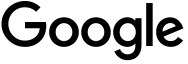

Temp:  {'company': 'paveapp', 'job_title': "Sorry, we couldn't find anything here", 'job_description': '', 'url': 'https://jobs.lever.co/paveapp/09b9e8b7-293e-4248-9a70-9ace08fe82ae'}
Company:  https://jobs.lever.co/sensortower/02d6988d-319a-41fd-9c0c-e034b17b43f8
Temp:  {'company': 'sensortower', 'job_title': "Sorry, we couldn't find anything here", 'job_description': '', 'url': 'https://jobs.lever.co/sensortower/02d6988d-319a-41fd-9c0c-e034b17b43f8'}
Company:  https://jobs.lever.co/3pillarglobal/6ac08afb-3c03-454d-b8b8-d35d384341e7/apply
Temp:  {'company': '3pillarglobal', 'job_title': "Sorry, we couldn't find anything here", 'job_description': '', 'url': 'https://jobs.lever.co/3pillarglobal/6ac08afb-3c03-454d-b8b8-d35d384341e7/apply'}
Company:  https://jobs.lever.co/kunai/e07d2af1-55e5-4259-9109-983d78b8b90b/apply
Temp:  {'company': 'kunai', 'job_title': "Sorry, we couldn't find anything here", 'job_description': '', 'url': 'https://jobs.lever.co/kunai/e07d2af1-55e5-4259-9109-983d78

Temp:  {'company': 'sensortower', 'job_title': 'Senior Ruby on Rails Developer', 'job_description': '', 'url': 'https://jobs.lever.co/sensortower/c972561f-35fc-401a-9b30-13c418a0c183/apply'}
Company:  https://jobs.lever.co/htdevelopers/1dc061a5-d72f-4e90-bee8-1f0f049c9fb9
Temp:  {'company': 'htdevelopers', 'job_title': 'Senior Ruby on Rails Developer', 'job_description': "- At least 5 years commercial experience, with knowledge of Ruby;We are HTD Health –\xa0- Experience in Rails framework;What we need from you:- Demonstrated use of best practices;We appreciate if you have- Communicative level of English (B2+) – both spoken and written;When you join us we provide you with means to grow and we expect you to be continuously becoming better at:- Eagerness to learn and constantly improve yourself;What you'll get in return:- Being a team player focused on getting things done;- A+ office:Have we sparked your interest?- Previous experience working in Scrum and Agile Teams;- Strong interest in
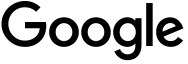

Temp:  {'company': 'kaiahealth', 'job_title': "Sorry, we couldn't find anything here", 'job_description': '', 'url': 'https://jobs.lever.co/kaiahealth/462832c2-23bd-4ebf-ab17-113f37e568f1/apply'}
Company:  https://jobs.lever.co/gorillalogic/643e0204-0a28-4979-a48c-7911b4c5b728
Temp:  {'company': 'gorillalogic', 'job_title': 'Senior Fullstack Developer – Ruby on Rails - JT', 'job_description': 'Gorilla Logic is looking for a Senior Fullstack Developer with exceptional web, web services and other backend development skills to work as a member of an Agile team responsible for building and maintaining our client’s web and mobile applications. Our environment will require you to work effectively with your teammates, of course. But your real success will be measured by how well you couple critical thinking with self-motivation, enthusiasm, and determination.Responsibilities*Work with an agile team to build, maintain and optimize our client’s web and mobile applicationsTechnical Requirements*
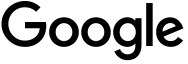

Temp:  {'company': 'happyco', 'job_title': "Sorry, we couldn't find anything here", 'job_description': '', 'url': 'https://jobs.lever.co/happyco/300c27d6-decc-4d3d-9737-0569dc6b7cd9/apply'}
Company:  https://jobs.lever.co/boldpenguin/e8916f41-2427-478a-9fb7-984fa54ec45a/apply
Temp:  {'company': 'boldpenguin', 'job_title': "Sorry, we couldn't find anything here", 'job_description': '', 'url': 'https://jobs.lever.co/boldpenguin/e8916f41-2427-478a-9fb7-984fa54ec45a/apply'}
Company:  https://jobs.lever.co/gorillalogic/eab1eab5-7747-4bb2-bda8-4ddeebe8d838
Temp:  {'company': 'gorillalogic', 'job_title': 'Senior Fullstack Developer – Ruby on Rails - JT', 'job_description': 'Gorilla Logic is looking for a Senior Fullstack Developer with exceptional web, web services and other backend development skills to work as a member of an Agile team responsible for building and maintaining our client’s web and mobile applications. Our environment will require you to work effectively with your teammates, 

Temp:  {'company': 'gorillalogic', 'job_title': 'Senior Fullstack Developer - Ruby on Rails - JT', 'job_description': 'Gorilla Logic is looking for a Senior Fullstack Developer with exceptional web, web services and other backend development skills to work as a member of an Agile team responsible for building and maintaining our client’s web and mobile applications. Our environment will require you to work effectively with your teammates, of course. But your real success will be measured by how well you couple critical thinking with self-motivation, enthusiasm, and determination.Responsibilities*Work with an agile team to build, maintain and optimize our client’s web and mobile applicationsTechnical Requirements*Mentor more junior developersBonus Skills*Work with DevOps and QA to build a quality focused CI/CD pipeline*Build out unit tests to ensure that the code is reasonably tested prior to shipment*Work in an Agile environment to define, estimate and work user stories*Excellent Engli
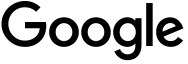

Temp:  {'company': 'medallia', 'job_title': 'Ruby on Rails Developer', 'job_description': '', 'url': 'https://jobs.lever.co/medallia/e4170bab-af48-47c0-9cd6-ec4e935d854e/apply'}
Company:  https://jobs.lever.co/intricately/1f1d1cc1-ca74-4c59-8f87-78361f0189ae/apply
Temp:  {'company': 'intricately', 'job_title': 'Backend Engineer (Ruby/Rails)', 'job_description': '', 'url': 'https://jobs.lever.co/intricately/1f1d1cc1-ca74-4c59-8f87-78361f0189ae/apply'}
Company:  https://jobs.lever.co/prevail/d028f28a-60d4-4519-b9d0-ae895b5a1903
Temp:  {'company': 'prevail', 'job_title': 'Senior Full Stack Developer (Ruby on Rails)', 'job_description': 'A well-funded startup based in San Francisco, our workforce includes a diverse collection of individuals located all across the country. Our first-of-its-kind platform combines secure video conferencing with a collection of intuitive tools developed for conducting remote, in-person, and hybrid legal proceedings. By maintaining a dynamic work environment wh

ELLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLSSSSSSSSSSSSSSSSSSSSEEEEEEEEEEEEEEEEEEEE
Delete Tags:  [<div class="action-menu" jscontroller="yGWMub"><a aria-expanded="false" aria-haspopup="true" aria-label="Result options" class="GHDvEf" data-ved="2ahUKEwjspfeq0J73AhXFwAIHHRmoD5Q4lgEQ7B16BAgFEAQ" href="#" jsaction="PZcoEd;keydown:wU6FVd;keypress:uWmNaf" role="button"><span class="gTl8xb"></span></a><ol class="action-menu-panel wHYlTd zsYMMe" data-ved="2ahUKEwjspfeq0J73AhXFwAIHHRmoD5Q4lgEQqR96BAgFEAU" jsaction="keydown:Xiq7wd;mouseover:pKPowd;mouseout:O9bKS" role="menu" tabindex="-1"><li class="action-menu-item OhScic zsYMMe" role="menuitem"><a class="fl" href="https://webcache.googleusercontent.com/search?q=cache:tvWK2nZwjFEJ:https://jobs.lever.co/gorillalogic/9f3904c3-7759-40fa-9126-4d1c4eb0ffb8+&amp;cd=151&amp;hl=en&amp;ct=clnk&amp;gl=pk" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://webcache.googleusercontent.com/search%3Fq%3Dcache:tvWK2nZwjFEJ:https://jobs.lever.
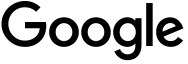

google.jslm=3;</script><div class="yp" data-async-context="async_id_prefix:" data-async-context-required="async_id_prefix" data-async-type="reviewDialog" data-jiis="up" id="reviewDialog"></div><div id="dbg_"></div></div><script nonce="" src="/xjs/_/js/k=xjs.s.en_GB.IDFj1Y9CF9M.O/am=AlABAC4AAAAwCwIAAAAAAAAAEAi8bwEAAOFIkAQAAAggCAAAEABAQAxBAAAAAB_xD0DO3wDAQBMuAAAAAAAAABCASxAMVCBREAACAAAAAJDV1NXLnEAg/d=1/ed=1/dg=2/esmo=1/br=1/rs=ACT90oEMfLTKSQdDOoAqT2sOmNQ3S1igDA/m=attn,cdos,dpf,hsm,jsa,d,csi"></script><script async="" nonce="" src="/xjs/_/js/k=xjs.s.en_GB.IDFj1Y9CF9M.O/ck=xjs.s.45KiK1Fa5Xo.L.W.O/am=AlABAC4AAAAwCwIAAAAAAAAAEAi8bwEAAOFIkAQAAAggCAAAEABAQAxBAAAAAB_xD0DO3wDAQBMuAAAAAAAAABCASxAMVCBREAACAAAAAJDV1NXLnEAg/d=1/exm=attn,cdos,csi,d,dpf,hsm,jsa/esmo=1/ed=1/dg=2/br=1/rs=ACT90oER-XQxMHaisEwOk_xTJM2sf8WhYg/ee=rXjWyb:VWuaCc;uY49fb:COQbmf;EVNhjf:pw70Gc;g8nkx:U4MzKc;wQlYve:aLUfP;kbAm9d:MkHyGd;F9mqte:UoRcbe;sTsDMc:kHVSUb;dtl0hd:lLQWFe;yGxLoc:FmAr0c;dIoSBb:ZgGg9b;pXdRYb:JKoKVe;wR5FRb:TtcOte;K

Temp:  {'company': 'xometry', 'job_title': 'Backend Software Developer (Ruby on Rails / React & Typescript)', 'job_description': '\xa0is the source for on-demand manufacturing, offering massive capacity, instant online quotes, fast lead times, and affordable pricing. Our global network of over 5,000 manufacturing facilities enables us to maintain consistently fast lead times while offering a broad array of capabilities includes\xa0Backend Software Developer,\xa0Ruby on Rails + React/Typescript/GraphQL,\xa0remote full-time,\xa0, and a industry-leading\xa0. We have a diverse customer base, ranging from startups to Fortune 100 companies and can make anything from a single prototype to millions of parts.\xa0We are expanding our IT team and looking for  who can support our efforts in platform development. Our core tech stack is currently . This position is  and includes active feature ownership: you are not only closing tickets but participating in product development, defining the architec
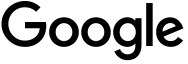

Temp:  {'company': 'coupa', 'job_title': "Sorry, we couldn't find anything here", 'job_description': '', 'url': 'https://jobs.lever.co/coupa/0e979df9-cf86-434f-b80e-1a5660db8ee5/apply'}
Company:  https://jobs.lever.co/sensortower/f087e95d-8188-4dca-bff4-ff9502daaf55/apply
Temp:  {'company': 'sensortower', 'job_title': "Sorry, we couldn't find anything here", 'job_description': '', 'url': 'https://jobs.lever.co/sensortower/f087e95d-8188-4dca-bff4-ff9502daaf55/apply'}
Company:  https://jobs.lever.co/coupa/490447e9-d8d8-4692-8972-e791364eb0e7/apply
Temp:  {'company': 'coupa', 'job_title': 'Ruby on Rails - Senior Software Engineer', 'job_description': '', 'url': 'https://jobs.lever.co/coupa/490447e9-d8d8-4692-8972-e791364eb0e7/apply'}
Company:  https://jobs.lever.co/roofstock/827207c2-7828-465e-9bf6-b4d0373eb203/apply
Temp:  {'company': 'roofstock', 'job_title': "Sorry, we couldn't find anything here", 'job_description': '', 'url': 'https://jobs.lever.co/roofstock/827207c2-7828-465e-9bf6-b
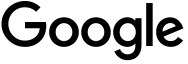

google.jslm=3;</script><div class="yp" data-async-context="async_id_prefix:" data-async-context-required="async_id_prefix" data-async-type="reviewDialog" data-jiis="up" id="reviewDialog"></div><div id="dbg_"></div></div><script nonce="" src="/xjs/_/js/k=xjs.s.en_GB.IDFj1Y9CF9M.O/am=AlABAC4AAAAwCwIAAAAAAAAAEAi8bwEAAOFIkAQAAAggCAAAEABAQAxBAAAAAB_xD0DO3wDAQBMuAAAAAAAAABCASxAMVCBREAACAAAAAJDV1NXLnEAg/d=1/ed=1/dg=2/esmo=1/br=1/rs=ACT90oEMfLTKSQdDOoAqT2sOmNQ3S1igDA/m=attn,cdos,dpf,hsm,jsa,d,csi"></script><script async="" nonce="" src="/xjs/_/js/k=xjs.s.en_GB.IDFj1Y9CF9M.O/ck=xjs.s.45KiK1Fa5Xo.L.W.O/am=AlABAC4AAAAwCwIAAAAAAAAAEAi8bwEAAOFIkAQAAAggCAAAEABAQAxBAAAAAB_xD0DO3wDAQBMuAAAAAAAAABCASxAMVCBREAACAAAAAJDV1NXLnEAg/d=1/exm=attn,cdos,csi,d,dpf,hsm,jsa/esmo=1/ed=1/dg=2/br=1/rs=ACT90oER-XQxMHaisEwOk_xTJM2sf8WhYg/ee=rXjWyb:VWuaCc;uY49fb:COQbmf;EVNhjf:pw70Gc;g8nkx:U4MzKc;wQlYve:aLUfP;kbAm9d:MkHyGd;F9mqte:UoRcbe;sTsDMc:kHVSUb;dtl0hd:lLQWFe;yGxLoc:FmAr0c;dIoSBb:ZgGg9b;pXdRYb:JKoKVe;wR5FRb:TtcOte;K

Temp:  {'company': 'peek', 'job_title': 'Software Engineer - Ruby - Remote', 'job_description': "With over $2 billion in bookings of experiences, the   platform combines powerful business software with an award-winning marketplace for consumers to book fun things to do like wine tours, watersports, skydiving, art classes, and more.\xa0 The Peek Pro software suite provides world-class online booking, point-of-sale, and hundreds of automation tools such as inventory management, dynamic pricing, waivers, and marketing analytics. Thousands of operators like the Museum of Ice Cream, Artechouse, and Jam NOLA have grown their business and automated their operations with our technology. Peek follows a “remote-first” philosophy, with our team of over 250 Peeksters distributed across exciting locales such as San Francisco, New York, Austin, Nashville, Salt Lake City, Santiago, Medellin and beyond.\xa0 We recently raised over $80 million backed by Westcap and Goldman Sachs to continue uniting the
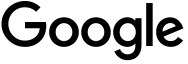

Temp:  {'company': 'PDQ', 'job_title': 'Senior Software Engineer - Ruby on Rails (SLC or Remote - US)', 'job_description': ' is located in Salt Lake City, Utah. We deliver products that make device management simple and secure, pretty damn quick. We are backed by TA Associates, a top-tier global PE fund.', 'url': 'https://jobs.lever.co/PDQ/005761e4-b8f1-47f4-b71b-d8fb80eb6280'}
Company:  https://jobs.lever.co/sparkdigital/d813785c-6593-42d4-8561-e66313beb133
Temp:  {'company': 'sparkdigital', 'job_title': 'Ruby on Rails - Sr Software Engineer', 'job_description': 'At Spark Digital, we believe that creating digital experiences is an inherently human and collaborative process. That’s why we focus and invest relentlessly in two things: the individuals that make up our team, and the quality of service we provide to our clients. We cultivate an environment where new ideas and excellence have room to thrive - even with a remote workforce. Our culture of learning rewards curiosity and gives o

Temp:  {'company': 'FLASH', 'job_title': 'Rails Core Engineer', 'job_description': "At this time we're only considering prospective employees currently residing in the United States for this position.", 'url': 'https://jobs.lever.co/FLASH/fa51d41e-f34a-4f03-a1b4-b8d8764d15c4'}
Company:  https://jobs.lever.co/sparkdigital/a04cceca-af08-4159-8f7f-22e804103745/apply
Temp:  {'company': 'sparkdigital', 'job_title': 'Ruby on Rails - Ssr. Software Engineer', 'job_description': '', 'url': 'https://jobs.lever.co/sparkdigital/a04cceca-af08-4159-8f7f-22e804103745/apply'}
Company:  https://jobs.lever.co/coupa/e1aae805-6fac-475f-82c3-dfeb4d7c91db/apply
Temp:  {'company': 'coupa', 'job_title': 'Ruby on Rails - Lead Software Engineer', 'job_description': '', 'url': 'https://jobs.lever.co/coupa/e1aae805-6fac-475f-82c3-dfeb4d7c91db/apply'}
Company:  https://jobs.lever.co/fullstacklabs/bae191ed-6e01-49c5-8092-82141479306f/apply
Temp:  {'company': 'fullstacklabs', 'job_title': 'Ruby on Rails Developer - 
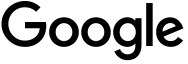

Temp:  {'company': 'sparkdigital', 'job_title': 'Ruby on Rails - Sr. Software Engineer', 'job_description': '', 'url': 'https://jobs.lever.co/sparkdigital/515ae749-f704-4f1b-ac15-b6fae8044ac3/apply'}
Company:  https://jobs.lever.co/paveapp/09b9e8b7-293e-4248-9a70-9ace08fe82ae/apply
Temp:  {'company': 'paveapp', 'job_title': "Sorry, we couldn't find anything here", 'job_description': '', 'url': 'https://jobs.lever.co/paveapp/09b9e8b7-293e-4248-9a70-9ace08fe82ae/apply'}
Company:  https://jobs.lever.co/gorillalogic/47a3c7d2-9b1b-4679-89e2-9e6dbba89f8b/apply
Temp:  {'company': 'gorillalogic', 'job_title': 'Ruby on Rails Engineer - EG', 'job_description': '', 'url': 'https://jobs.lever.co/gorillalogic/47a3c7d2-9b1b-4679-89e2-9e6dbba89f8b/apply'}
Company:  https://jobs.lever.co/coupa/e6a9ed2d-a64b-418c-abbf-3ecfb540d4de/apply
Temp:  {'company': 'coupa', 'job_title': 'Senior Software Engineer, Ruby on Rails', 'job_description': '', 'url': 'https://jobs.lever.co/coupa/e6a9ed2d-a64b-418c-abbf-3

Temp:  {'company': 'centralreach', 'job_title': 'Ruby Developer (Remote - US) - Mid to Senior Level', 'job_description': 'CentralReach is the   of SaaS software solutions for autism care. Trusted by more than 115,000 users, we enable therapy providers, educators, and employers to scale the way they deliver Applied Behavior Analysis therapy with innovative technology, market-leading industry expertise, and world-class customer satisfaction.', 'url': 'https://jobs.lever.co/centralreach/e0c8e070-891e-4719-8834-39d6cb35631b'}
Company:  https://jobs.lever.co/versapay/19ef4dc4-9d07-42f0-bfe3-524cb4e4d0db/apply
Temp:  {'company': 'versapay', 'job_title': "Sorry, we couldn't find anything here", 'job_description': '', 'url': 'https://jobs.lever.co/versapay/19ef4dc4-9d07-42f0-bfe3-524cb4e4d0db/apply'}
Company:  https://jobs.lever.co/sparkdigital/ec277b30-b480-4a07-a5a4-98b42ca2ae80/apply
Temp:  {'company': 'sparkdigital', 'job_title': 'Ruby on Rails - Senior Software Engineer', 'job_description
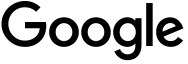

Temp:  {'company': 'coupa', 'job_title': 'Full Stack Rails Engineer - (REMOTE)', 'job_description': "This is a rare opportunity to join our team at the beginning of a new mission, as we look to redefine how people find and buy homes on a national and eventually international scale. We are rethinking today's generic home search experience and creating a set of next-generation tools that will help millions of people around the world find and buy their next home and help their agents to deliver a great user experience. To achieve these ambitious goals, we'll be keeping things simple and transparent in the product design, code, and team. We believe that simple can be hard, but simple is worth the effort.\xa0 It's important to us that work is as enjoyable and drama-free as possible. Not every day will be sunshine and rainbows, but we've got each other's backs, and come together to help each other when we're unsure, stuck, or facing adversity. We like making well-reasoned decisions and makin

WebDriverException: Message: target frame detached
  (Session info: chrome=100.0.4896.127)
Stacktrace:
Backtrace:
	Ordinal0 [0x01037413+2389011]
	Ordinal0 [0x00FC9F61+1941345]
	Ordinal0 [0x00EBC520+836896]
	Ordinal0 [0x00EAD957+776535]
	Ordinal0 [0x00EAC995+772501]
	Ordinal0 [0x00EACF98+774040]
	Ordinal0 [0x00EACF28+773928]
	Ordinal0 [0x00EB2C56+797782]
	Ordinal0 [0x00EB2E99+798361]
	Ordinal0 [0x00EAE16D+778605]
	Ordinal0 [0x00EAE685+779909]
	Ordinal0 [0x00EAE46F+779375]
	Ordinal0 [0x00EADA86+776838]
	Ordinal0 [0x00EAD2EB+774891]
	Ordinal0 [0x00EAD189+774537]
	Ordinal0 [0x00EBDA10+842256]
	Ordinal0 [0x00F13BCB+1194955]
	Ordinal0 [0x00F03F66+1130342]
	Ordinal0 [0x00EDE546+976198]
	Ordinal0 [0x00EDF456+980054]
	GetHandleVerifier [0x011E9632+1727522]
	GetHandleVerifier [0x0129BA4D+2457661]
	GetHandleVerifier [0x010CEB81+569713]
	GetHandleVerifier [0x010CDD76+566118]
	Ordinal0 [0x00FD0B2B+1968939]
	Ordinal0 [0x00FD5988+1989000]
	Ordinal0 [0x00FD5A75+1989237]
	Ordinal0 [0x00FDECB1+2026673]
	BaseThreadInitThunk [0x76AFFA29+25]
	RtlGetAppContainerNamedObjectPath [0x77467A7E+286]
	RtlGetAppContainerNamedObjectPath [0x77467A4E+238]


In [6]:
# full_stack = 'fullstack developer'
engineers_list = ['ruby on rails']
for engineer in engineers_list:
    driver.get("https://www.google.com/search?q={}+site%3Ajobs.lever.co".format(engineer))
    time.sleep(2)
    while(1):
        res = Selector(text=driver.page_source)
        companies = res.css('div.jtfYYd div.yuRUbf a::attr(href)').getall()
        if len(companies) == 10:
            print('Companies: ', companies)
#             companies_name = res.css('div.yuRUbf a h3::text').getall()
            nextpage = res.css('#pnnext::attr(href)').get()
            if nextpage:
                for company in companies:
                    print('Company: ', company)
#                     print('Name: ', name)
                    name = company.split('.co/')[1].split('/')[0]
                    scrape_companies(company,name)
                nextpage_url = 'https://www.google.com' + nextpage
                driver.get(nextpage_url)
                time.sleep(1)
            else:
                for company in companies:
                    scrape_companies(company,name)
                break
        else:
            print('ELLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLSSSSSSSSSSSSSSSSSSSSEEEEEEEEEEEEEEEEEEEE')
            soup = bs(driver.page_source)
            delete_tags = soup.select('div.action-menu')
            print('Delete Tags: ', delete_tags)
            print('Length of Deleted Tags: ', len(delete_tags))
            for tag in delete_tags:
                tag.decompose()
            more_deleted_tags = soup.select('li.action-menu-item.OhScic.zsYMMe')
            for tag in more_deleted_tags:
                tag.decompose()
            print(soup)
            res = Selector(text=soup.prettify())
            companies = res.css('div.jtfYYd div.yuRUbf a::attr(href)').getall()
            print('Companies: ', companies)
#             companies_name = res.css('div.yuRUbf a h3::text').getall()
            nextpage = res.css('#pnnext::attr(href)').get()
            if nextpage:
                for company in companies:
                    print('Company: ', company)
                    name = company.split('.co/')[1].split('/')[0]
                    scrape_companies(company,name)
                nextpage_url = 'https://www.google.com' + nextpage
                driver.get(nextpage_url)
                time.sleep(1)
            else:
                for company in companies:
                    scrape_companies(company,name)
                break
        

# TEST CASE

In [3]:
df = pd.read_csv('jobs_lever2.csv')

In [4]:
df

company                                  job_title  \
0     reloadly-2                        Fullstack Developer   
1     therecount                        Fullstack Developer   
2         myob-2                        Fullstack Developer   
3          burnt                        Fullstack Developer   
4        abtasty           Fullstack Developer (React / Go)   
...          ...                                        ...   
1250       coupa     Ruby on Rails Developer - Remote - USA   
1251       coupa  Ruby on Rails Developer - Remote - Canada   
1252       coupa     Ruby on Rails Developer - Remote - USA   
1253       coupa     Ruby on Rails Developer - Remote - USA   
1254       coupa                    Ruby on Rails Developer   

                                        job_description  \
0     We’re Reloadly. We provide payment APIs for ai...   
1     About UsThe Recount is a fast-growing news sta...   
2     MYOB is a business platform. Our purpose is to...   
3     Burnt Finance is building the decentralized fu...   
4     To strengthen the developer experience of our ...   
...                                                 ...   
1250  FullStack Labs is the fastest-growing software...   
1251  FullStack Labs is the fastest-growing software...   
1252  FullStack Labs is the fastest-growing software...   
1253  FullStack Labs is the fastest-growing software...   
1254  Medallia is the pioneer and market leader in E...   

                                                    url  
0     https://jobs.lever.co/reloadly-2/34961a44-4682...  
1     https://jobs.lever.co/therecount/f4d0910d-f9eb...  
2     https://jobs.lever.co/myob-2/95198103-7f6c-4fa...  
3     https://jobs.lever.co/burnt/0e0c9569-ade5-468c...  
4     https://jobs.lever.co/abtasty/df82d8d4-2293-48...  
...                                                 ...  
1250  https://jobs.lever.co/fullstacklabs/44589e86-b...  
1251  https://jobs.lever.co/fullstacklabs/2948d8db-5...  
1252  https://jobs.lever.co/fullstacklabs/970d9914-3...  
1253  https://jobs.lever.co/fullstacklabs/296fec9a-5...  
1254  https://jobs.lever.co/medallia/e4170bab-af48-4...  

[1255 rows x 4 columns]

In [5]:
df['company'] = df['company'].str.capitalize()

In [6]:
df

company                                  job_title  \
0     Reloadly-2                        Fullstack Developer   
1     Therecount                        Fullstack Developer   
2         Myob-2                        Fullstack Developer   
3          Burnt                        Fullstack Developer   
4        Abtasty           Fullstack Developer (React / Go)   
...          ...                                        ...   
1250       Coupa     Ruby on Rails Developer - Remote - USA   
1251       Coupa  Ruby on Rails Developer - Remote - Canada   
1252       Coupa     Ruby on Rails Developer - Remote - USA   
1253       Coupa     Ruby on Rails Developer - Remote - USA   
1254       Coupa                    Ruby on Rails Developer   

                                        job_description  \
0     We’re Reloadly. We provide payment APIs for ai...   
1     About UsThe Recount is a fast-growing news sta...   
2     MYOB is a business platform. Our purpose is to...   
3     Burnt Finance is building the decentralized fu...   
4     To strengthen the developer experience of our ...   
...                                                 ...   
1250  FullStack Labs is the fastest-growing software...   
1251  FullStack Labs is the fastest-growing software...   
1252  FullStack Labs is the fastest-growing software...   
1253  FullStack Labs is the fastest-growing software...   
1254  Medallia is the pioneer and market leader in E...   

                                                    url  
0     https://jobs.lever.co/reloadly-2/34961a44-4682...  
1     https://jobs.lever.co/therecount/f4d0910d-f9eb...  
2     https://jobs.lever.co/myob-2/95198103-7f6c-4fa...  
3     https://jobs.lever.co/burnt/0e0c9569-ade5-468c...  
4     https://jobs.lever.co/abtasty/df82d8d4-2293-48...  
...                                                 ...  
1250  https://jobs.lever.co/fullstacklabs/44589e86-b...  
1251  https://jobs.lever.co/fullstacklabs/2948d8db-5...  
1252  https://jobs.lever.co/fullstacklabs/970d9914-3...  
1253  https://jobs.lever.co/fullstacklabs/296fec9a-5...  
1254  https://jobs.lever.co/medallia/e4170bab-af48-4...  

[1255 rows x 4 columns]